In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



In [2]:
df=pd.read_csv("data.csv")
df.shape

(6819, 96)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
x = df['Bankrupt?']
print(x)

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64


In [5]:
for i in df.columns:
  co=df[i].corr(x)
  if (co < 0.2 and co > -0.2):
    df=df.drop(columns=[i])
  df.shape


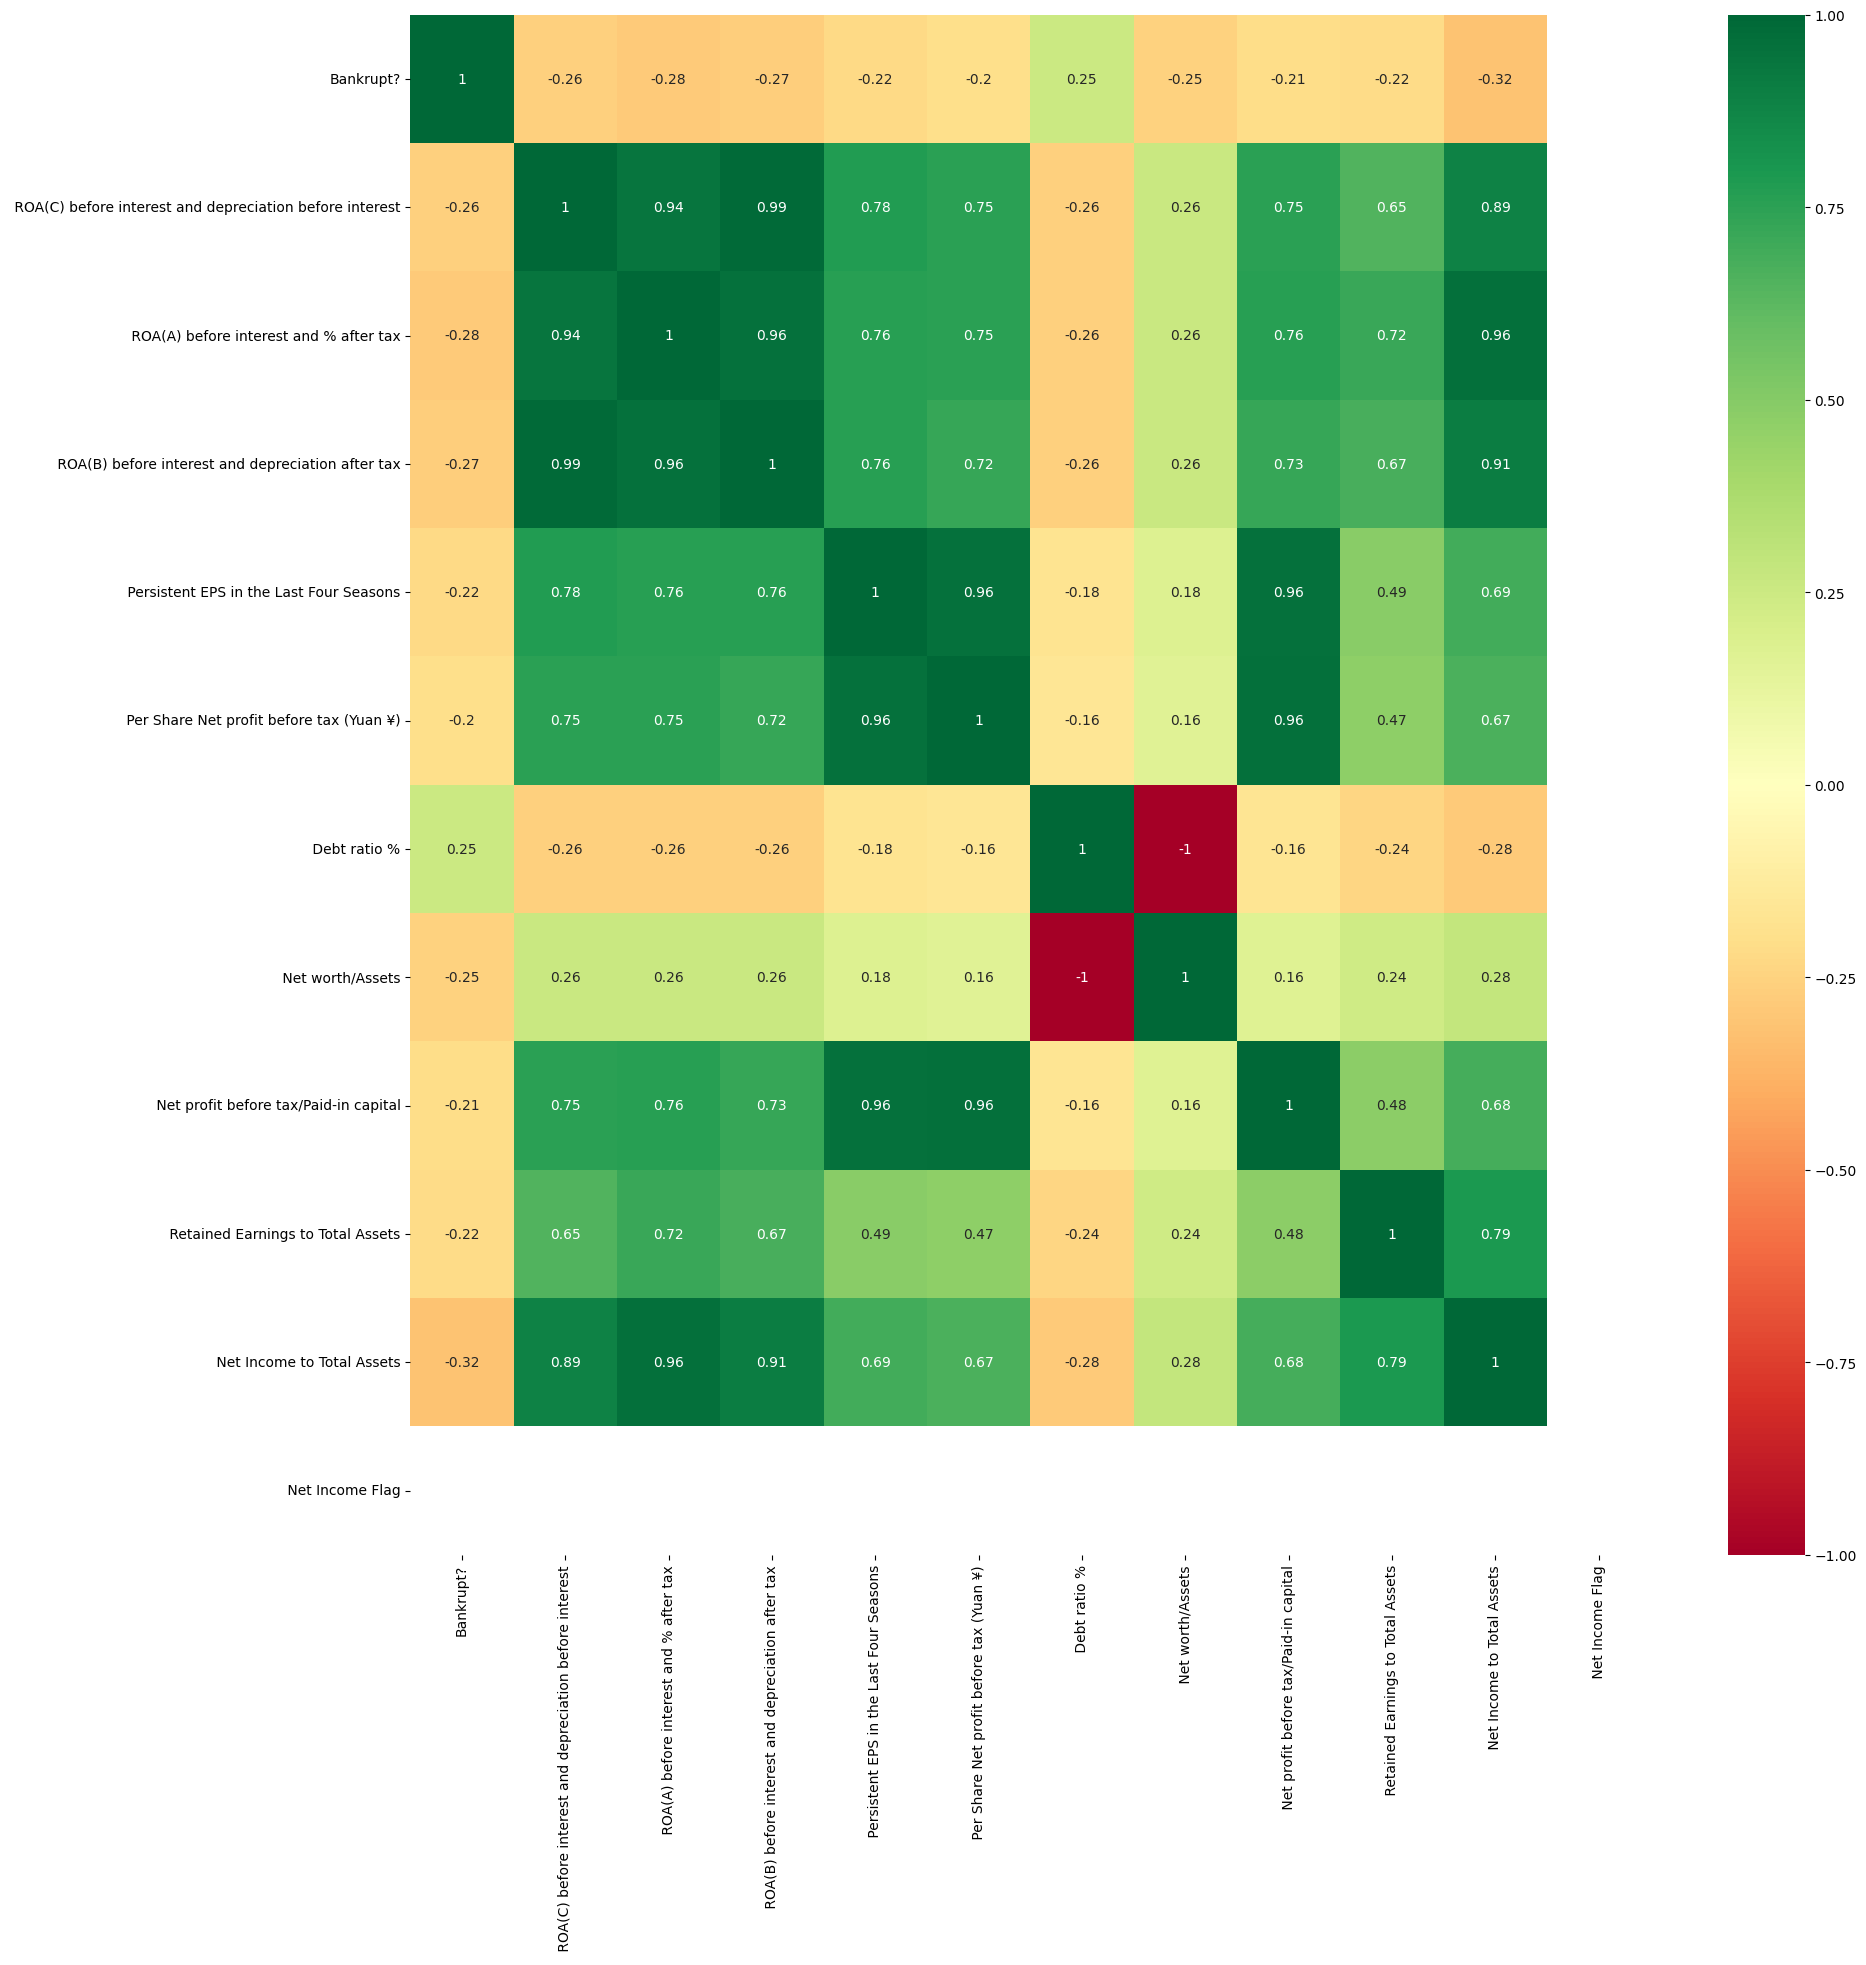

In [6]:
cor=df.corr()
feature=cor.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[feature].corr(),annot=True,cmap="RdYlGn")

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 12 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Persistent EPS in the Last Four Seasons                  6819 non-null   float64
 5    Per Share Net profit before tax (Yuan ¥)                 6819 non-null   float64
 6    Debt ratio %                                             6819 non-null   float64
 7    Net worth/Assets                                         6819 non-null   float64
 8    Net profit before

In [8]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Net profit before tax/Paid-in capital,Retained Earnings to Total Assets,Net Income to Total Assets,Net Income Flag
0,1,0.370594,0.424389,0.405750,0.169141,0.138736,0.207576,0.792424,0.137757,0.903225,0.716845,1
1,1,0.464291,0.538214,0.516730,0.208944,0.169918,0.171176,0.828824,0.168962,0.931065,0.795297,1
2,1,0.426071,0.499019,0.472295,0.180581,0.142803,0.207516,0.792484,0.148036,0.909903,0.774670,1
3,1,0.399844,0.451265,0.457733,0.193722,0.148603,0.151465,0.848535,0.147561,0.906902,0.739555,1
4,1,0.465022,0.538432,0.522298,0.212537,0.168412,0.106509,0.893491,0.167461,0.913850,0.795016,1


In [9]:
y = df_dummies['Bankrupt?'].values
X = df_dummies.drop(columns=['Bankrupt?'])
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [10]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101 )

In [11]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [12]:
from sklearn import metrics
pt=model.predict(X_train)
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print ("Train set accuracy =>",metrics.accuracy_score(y_train,pt))
print ("Test set accuracy =>",metrics.accuracy_score(y_test, prediction_test))

Train set accuracy => 0.9688359303391384
Test set accuracy => 0.9699413489736071


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1319
           1       1.00      0.09      0.16        45

    accuracy                           0.97      1364
   macro avg       0.98      0.54      0.57      1364
weighted avg       0.97      0.97      0.96      1364



In [14]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
model_rf = RandomForestClassifier(n_estimators=10 , oob_score = True, n_jobs = -1,
                                  random_state =5, max_features = "auto",
                                  max_leaf_nodes = 20)
model_rf.fit(X_train, y_train)

pt = model_rf.predict(X_train)
prediction_test = model_rf.predict(X_test)
print ("Train set accuracy =>",metrics.accuracy_score(y_train,pt))
print ("Test set accuracy =>",metrics.accuracy_score(y_test, prediction_test))

Train set accuracy => 0.9759853345554537
Test set accuracy => 0.968475073313783


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [15]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1319
           1       0.75      0.07      0.12        45

    accuracy                           0.97      1364
   macro avg       0.86      0.53      0.55      1364
weighted avg       0.96      0.97      0.96      1364



In [22]:
#importing tensor flow for ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

model = keras.Sequential([
    keras.layers.Dense(10, activation='linear'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=6)

Epoch 1/6
171/171 [==============================] - 1s 1ms/step - loss: 0.5393 - accuracy: 0.9688
Epoch 2/6
171/171 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.9688
Epoch 3/6
171/171 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9688
Epoch 4/6
171/171 [==============================] - 0s 2ms/step - loss: 0.0899 - accuracy: 0.9688
Epoch 5/6
171/171 [==============================] - 0s 992us/step - loss: 0.0552 - accuracy: 0.9712
Epoch 6/6
171/171 [==============================] - 0s 1ms/step - loss: 0.0338 - accuracy: 1.0000


In [23]:
yp = model.predict(xtest)
ypred=[]
for i in yp:
    if i>=0.5:
        ypred.append(1)
    else:
        ypred.append(0)

43/43 [==============================] - 0s 709us/step


In [24]:
print ("Test set accuracy =>",metrics.accuracy_score(ytest,ypred))

Test set accuracy => 1.0
